# 4. Hyperbolic Geometry

 Hyperbolic geometry arises from the assumption there there is *more* than 1 parallel line & hence the angle sum in a triangle is not 180 degrees.  From this it turns out that the angle sum is always less than 180 degrees & the difference between 180 degrees & the sum is proportional to the area of the triangle.

 From this arise 2 questions:

 1. Is the resulting geometry consistent?

 This can be made the case by proposing "pseudo-points", "pseudo-lines" & "pseudo-distance" of a hyperbolic geometry & proving that these pseudo object do satisfy the axioms for point, line & distance in hyperbolic geometry.

 2. Does it fit the real world?

 What is the "real world" interpretation?  Rays of light in a vacuum?  But in general relativity theory the path of a ray of light may not be straight in the intended sense; hence, we may consider:

 > Any geometrical axioms, Euclidean or non-Euclidean, offer a mathematical structure which may be open to a variety of different interpretations to suit a variety of geometrical (or even non-geometrical) circumstances.

In [1]:
from sympy import (
    Circle,
    Line,
    log,
    N,
    Not,
    Point,
    Segment
)

In [2]:
def get_random_point_within(C: Circle):
    """
    Return a random point within a circle.

    C: A circle.
    """
    A = C.center
    B = C.random_point()
    AB = Segment(A, B)
    return N(AB.random_point())


C1 = Circle(Point(0, 0), 1)
get_random_point_within(C1)

Point2D(0.228891386565046, 0.670298465373944)

In [3]:
def points_on_diameter(C: Circle, A: Point, B: Point):
    """
    Check whether both points are on the diameter of the circle.

    C: A circle.
    A: A point.
    B: A point.
    """
    if (Not(C.encloses_point(A))):
        return False
    if (Not(C.encloses_point(B))):
        return False
    center = C.center
    A_center = Line(A, center)
    return A_center.contains(B)


points_on_diameter(C1, Point(0, .25), Point(0, .5))

True

In [4]:
points_on_diameter(C1, Point(0, .25), Point(0, 5))

False

In [5]:
points_on_diameter(C1, Point(0, .25), Point(.25, .5))

False

In [20]:
def get_inverse_external(C: Circle, A: Point):
    """
    Get the inverse of 'A' with respect to 'C'.

    C: A circle.
    A: A point.
    """
    if (Not(C.encloses_point(A))):
        raise Exception("'A' is not within 'C'")
    O = C.center
    if (A.equals(O)):
        raise Exception("'A' cannot be the center.")
    OA = Line(O, A)
    l = OA.perpendicular_line(A)
    P = C.intersection(l)[0]
    OP = Line(O, P)
    l_prime = OP.perpendicular_line(P)
    B = OA.intersection(l_prime)
    return B[0]


get_inverse_external(C1, Point(0, .5))

Point2D(0, 2)

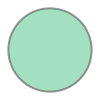

In [7]:
def get_orthogonal_circle(Circ: Circle, A: Point, B: Point):
    """
    Find a circle orthogonal to the given circle.

    Circ: A circle.
    A: A point.
    B: A point.
    """
    if (Not(Circ.encloses_point(A))):
        raise Exception("'A' is not within 'Circ'")
    if (Not(Circ.encloses_point(B))):
        raise Exception("'A' is not within 'Circ'")
    C = get_inverse_external(Circ, A)
    ortho_circ = Circle(A, B, C)
    return ortho_circ


C2 = get_orthogonal_circle(C1, Point(0, .5), Point(.75, 0))
C2

In [8]:
def get_point_on_psuedo_line(C1: Circle, C2: Circle):
    """
    Find a random point on the psuedo-line of C2 within C1.

    C1: A circle.
    C2: A circle.
    """
    O1 = N(C1.center)
    O2 = N(C2.center)
    A = N(C1.random_point())
    AO2 = Line(A, O2)
    X, Y = AO2.intersect(C2)
    X = N(X)
    Y = N(Y)
    if (O1.distance(X) <= O1.distance(Y)):
        return X
    else:
        return Y


get_point_on_psuedo_line(C1, C2)


Point2D(-0.187406854242927, 0.879935512858451)

In [9]:
def psuedo_distance(C1: Circle, C2: Circle, A: Point, B: Point):
    """
    Find a curve within 'C1' that is on 'C2'.

    C1: A circle.
    C2: An orthogonal circle.
    A: A point.
    B: A point.
    """
    S, T = C1.intersection(C2)
    S = N(S)
    T = N(T)

    AT = A.distance(T)
    AS = A.distance(S)
    BT = B.distance(T)
    BS = B.distance(S)

    numerator = AT / AS
    denominator = BT / BS
    
    return log(numerator / denominator)


A = get_point_on_psuedo_line(C1, C2)
B = get_point_on_psuedo_line(C1, C2)

psuedo_distance(C1, C2, A, B)

-2.81835315562514

In [10]:
A = get_point_on_psuedo_line(C1, C2)
A

Point2D(-0.210389379023772, 0.967289719156756)

In [22]:
Bs = [get_point_on_psuedo_line(C1, C2) for _ in range(10)]
distances = [A.distance(x) for x in Bs]
Bs_sorted = [x for _, x in sorted(zip(distances, Bs))]
Bs_sorted = [a for a in Bs_sorted if a.x > A.x]
Bs_sorted

[Point2D(-0.199193015231564, 0.921615021226813),
 Point2D(-0.190037494938280, 0.888787731756659),
 Point2D(-0.188646070346585, 0.884076492163448),
 Point2D(-0.177175342025311, 0.847515711744982),
 Point2D(-0.122515971433356, 0.709400120615149),
 Point2D(0.359375038596422, 0.162779884885448),
 Point2D(0.838040956068381, -0.0173223798338715)]

In [23]:
for B in Bs_sorted:
    result = psuedo_distance(C1, C2, A, B)
    print(result)

1.75731749457039
2.24317174594650
2.29825941522633
2.65460451262788
3.48593384795136
5.44330022444840
7.23504811703466


 > The development of non-Euclidean geometry represents a major change in the nature of Mathematics, from a science (of number and space) to a study of form.